In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [2]:
NP_Nucl = pd.read_csv('OUTPUT_1111/pred_score_nucl.tsv', sep='\t', header=None)
NP_Methyl = pd.read_csv('OUTPUT_1111/pred_score_methyl.tsv', sep='\t', header=None)

In [3]:
N = len(NP_Nucl)//2

In [4]:
Y_Nucl = pd.read_csv('OUTPUT_1111/peak_nucl.tsv', sep='\t', header=None)
Y_Methyl = pd.read_csv('OUTPUT_1111/peak_methyl.tsv', sep='\t', header=None)

In [5]:
def recalculate_fpr_tpr(fpr, tpr, totalT, totalF, percent):
    hT = totalF * percent/100 #hidden true
    
    T_re = totalT + hT
    F_re = totalF - hT
    
    hTp = tpr * hT
    Fp = fpr * totalF
    Fp_re = Fp - hTp
    fpr_re = Fp_re / F_re
        
    args = np.argsort(fpr_re)
    fpr_re_s = fpr_re[args]
    tpr_re_s = tpr[args]
    mask = (fpr_re_s>=0)
    
    return fpr_re_s[mask], tpr_re_s[mask]
    

In [6]:
def getTestPred(Y_true, Y_pred):
    y_test = np.array(Y_true).flatten()

    y_score_2x = np.array(Y_pred)
    y_score = ((y_score_2x[:N,:] + y_score_2x[N:,:]) / 2).flatten()

    totalT = np.sum(y_test)
    totalF = y_test.shape[0] - totalT
    
    return y_test, y_score, totalT, totalF



In [7]:
def getFprTprAuc(y_test, y_score, totalT, totalF):
    
    fpr, tpr, roc_auc = [0]*5, [0]*5, [0]*5

    fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
    roc_auc[0] = auc(fpr[0], tpr[0])

    for x in range(1,5):
        fpr[x], tpr[x] = recalculate_fpr_tpr(fpr[0], tpr[0], totalT, totalF, x*10 )
        roc_auc[x] = auc(fpr[x], tpr[x])
        
    return fpr, tpr, roc_auc

In [13]:
def drawAUC(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    cmap_a = ['grey','b','g','orange','r']

    plt.axis('square')
    for x in range(5):
        plt.plot(fpr[x], tpr[x], c=cmap_a[x],
             lw=lw, label='%d%% (AUC = %0.2f)' % (x*10, roc_auc[x]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
def drawPicFromData(Y_TRUE, NP_PRED):
    y_test, y_score, totalT, totalF = getTestPred(Y_TRUE, NP_PRED)
    fpr, tpr, roc_auc = getFprTprAuc(y_test, y_score, totalT, totalF)
    drawAUC(fpr, tpr, roc_auc)

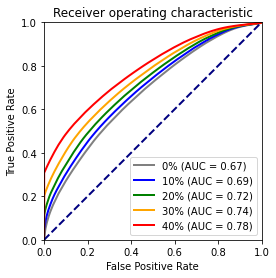

In [15]:
drawPicFromData(Y_Nucl, NP_Nucl)

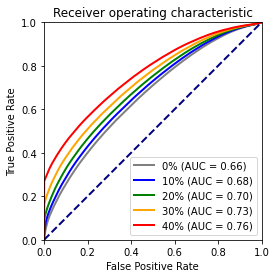

In [16]:
drawPicFromData(Y_Methyl, NP_Methyl)